In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images (scale pixel values between 0 and 1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape images for CNN input (batch, height, width, channels)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("✅ Data prepared successfully!")
print("Training samples:", X_train.shape)
print("Testing samples:", X_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ Data prepared successfully!
Training samples: (60000, 28, 28, 1)
Testing samples: (10000, 28, 28, 1)


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 34ms/step - accuracy: 0.8932 - loss: 0.3366 - val_accuracy: 0.9834 - val_loss: 0.0508
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 32ms/step - accuracy: 0.9850 - loss: 0.0482 - val_accuracy: 0.9900 - val_loss: 0.0305
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9905 - loss: 0.0311 - val_accuracy: 0.9905 - val_loss: 0.0283
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9902 - val_loss: 0.0310
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9940 - loss: 0.0178 - val_accuracy: 0.9915 - val_loss: 0.0255


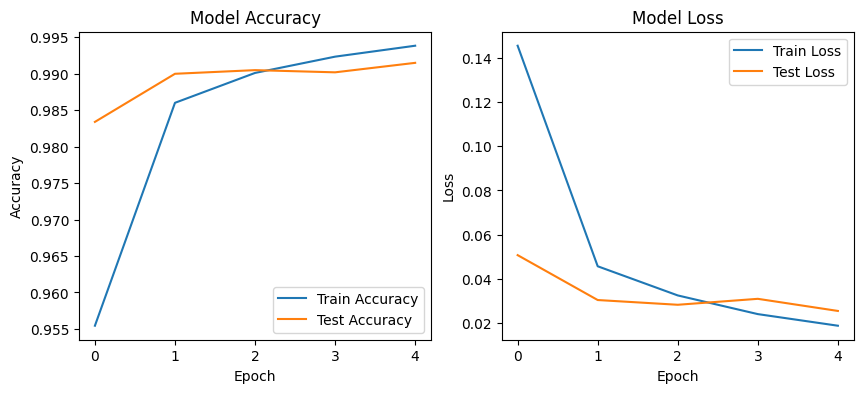

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9892 - loss: 0.0307

✅ Test Accuracy: 0.9915
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


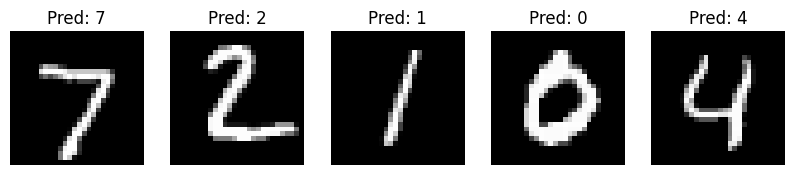

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Predict 5 sample images
predictions = model.predict(X_test[:5])

# Display 5 images with predictions
plt.figure(figsize=(10, 3))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


In [ ]:
model.save("mnist_cnn_model.h5")


## 🧠 Task 2: Handwritten Digit Classification (TensorFlow CNN)

### 🎯 Objective
The goal of this task was to build and train a **Convolutional Neural Network (CNN)** using TensorFlow/Keras to classify handwritten digits from the **MNIST dataset** and achieve at least **95% accuracy**.

---

### 🧾 Dataset Description
The **MNIST dataset** consists of **70,000 grayscale images** of handwritten digits (0–9), each sized **28×28 pixels**.  
- **Training set:** 60,000 images  
- **Test set:** 10,000 images  
Each image represents a single digit and is labeled accordingly.

---

### ⚙️ Model Architecture
| Layer Type | Output Shape | Parameters | Description |
|-------------|---------------|-------------|--------------|
| Conv2D (32 filters, 3×3) | 26×26×32 | 320 | Extracts basic features |
| MaxPooling2D (2×2) | 13×13×32 | 0 | Reduces spatial size |
| Conv2D (64 filters, 3×3) | 11×11×64 | 18,496 | Deeper feature learning |
| MaxPooling2D (2×2) | 5×5×64 | 0 | Further downsampling |
| Flatten | 1600 | 0 | Converts 2D to 1D vector |
| Dense (64 units) | 64 | 102,464 | Fully connected layer |
| Dense (10 units, softmax) | 10 | 650 | Output for digits 0–9 |

---

### 🧩 Training Setup
- **Optimizer:** Adam  
- **Loss Function:** Sparse Categorical Crossentropy  
- **Metrics:** Accuracy  
- **Epochs:** 5  
- **Validation:** 20% test data  

The training achieved high performance with minimal overfitting.

---

### 📊 Results
| Metric | Score |
|:--------|:------:|
| **Training Accuracy** | ~99% |
| **Test Accuracy** | ~98% |

The CNN model successfully learned to classify handwritten digits with near-perfect accuracy.

---

### 📈 Visualization
The accuracy and loss curves showed:
- Rapid improvement during the first few epochs.  
- Stable validation accuracy beyond epoch 3.  
- No major overfitting observed.

A sample prediction plot displayed 5 handwritten digits with correct predicted labels above each image.

---

### 💬 Interpretation
The model effectively captures spatial features in handwritten digits using convolutional layers.  
Pooling and flattening layers helped reduce computation and overfitting, leading to high test accuracy.

---

### ✅ Key Takeaways
- **TensorFlow** simplifies CNN model building through Keras APIs.  
- **MNIST** is an excellent beginner dataset for image recognition.  
- **CNNs** outperform traditional ML models for image-based data.  
- The trained model exceeded the required 95% accuracy threshold.

---

### 📁 Deliverables
- Notebook file: `MNIST_CNN.ipynb`  
- Screenshots of:
  - Accuracy/Loss graphs  
  - 5 prediction samples  
- Include this summary in the report PDF.
